In [4]:
!apt-get install libav-tools -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environmental-sound-classification-50/utils2.py
/kaggle/input/environmental-sound-classification-50/esc50.csv
/kaggle/input/environmental-sound-classification-50/bc_utils.py
/kaggle/input/environmental-sound-classification-50/utils.py
/kaggle/input/environmental-sound-classification-50/audio/audio/5-257349-A-15.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/5-195557-A-19.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/2-122820-B-36.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/1-115920-A-22.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/1-172649-C-40.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/2-50668-A-41.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/3-119120-E-48.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/1-223162-A-25.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/3-119459-A-26.wav
/kaggle/input/

In [26]:
!apt-get install libav-tools -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate


In [9]:
# Math libraries
import math
import statistics
import scipy.stats

## ML Libraries
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_auc_score , recall_score , precision_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from subprocess import check_output
from tqdm import tqdm

#Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential,save_model, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras import backend as K

#Audio libraries
import IPython.display as ipd
import librosa
from librosa import display
from scipy.io import wavfile as wav

#Torch libraries
import torch
import torchvision
import torchvision.transforms as tt
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor
import torch.optim as optim
from torch.optim import lr_scheduler

#Others
import time
import logging
logging.disable(logging.WARNING)
import warnings
warnings.filterwarnings("ignore")
import gc
gc.enable()
np.random.seed(42)

In [80]:
#reading the csv file
data = pd.read_csv('/kaggle/input/environmental-sound-classification-50/esc50.csv')
data

filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]

In [ ]:
#from scipy.io import wavfile

In [ ]:
#mbdf = {}
#for c in data["target"].unique():
    #file_list = data.loc[data["target"] == c, "filename"].tolist()
   # mbdf[c] = []
   # for f in file_list:
      #  sr, aud = wavfile.read(f"../input/environmental-sound-classification-50/audio/audio/{f}")
       # mbdf[c] += [[sr] + list(aud)]

In [ ]:
#_ = [np.array(mbdf[i]) for i in range(len(mbdf.keys()))]

In [ ]:
#np.concatenate(_)

In [26]:
data2=pd.DataFrame(data)
data2.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

In [9]:
data2.tail()

filename  fold  target        category  esc10  src_file take
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

In [10]:
data2.describe()

fold       target       src_file
count  2000.000000  2000.000000    2000.000000
mean      3.000000    24.500000  137696.797500
std       1.414567    14.434479   64882.993641
min       1.000000     0.000000     137.000000
25%       2.000000    12.000000   87726.250000
50%       3.000000    24.500000  143745.500000
75%       4.000000    37.000000  188215.000000
max       5.000000    49.000000  264453.000000

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB


In [12]:
data2.shape

(2000, 7)

In [13]:
data2.columns

Index(['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take'], dtype='object')

In [81]:
labels = list(data['category'].unique())
labels

['dog',
 'chirping_birds',
 'vacuum_cleaner',
 'thunderstorm',
 'door_wood_knock',
 'can_opening',
 'crow',
 'clapping',
 'fireworks',
 'chainsaw',
 'airplane',
 'mouse_click',
 'pouring_water',
 'train',
 'sheep',
 'water_drops',
 'church_bells',
 'clock_alarm',
 'keyboard_typing',
 'wind',
 'footsteps',
 'frog',
 'cow',
 'brushing_teeth',
 'car_horn',
 'crackling_fire',
 'helicopter',
 'drinking_sipping',
 'rain',
 'insects',
 'laughing',
 'hen',
 'engine',
 'breathing',
 'crying_baby',
 'hand_saw',
 'coughing',
 'glass_breaking',
 'snoring',
 'toilet_flush',
 'pig',
 'washing_machine',
 'clock_tick',
 'sneezing',
 'rooster',
 'sea_waves',
 'siren',
 'cat',
 'door_wood_creaks',
 'crickets']

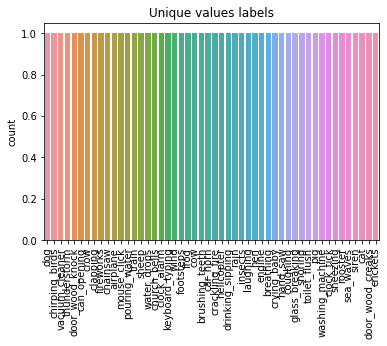

In [15]:
#Visualizing unique values
sns.countplot(labels).set_title("Unique values labels")
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(11,8)})

In [16]:
data2['category'].value_counts(dropna=False)

dog                 40
glass_breaking      40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
snoring             40
chirping_birds      40
toilet_flush        40
pig                 40
washing_machine     40
clock_tick          40
sneezing            40
rooster             40
sea_waves           40
siren               40
cat                 40
door_wood_creaks    40
helicopter          40
crackling_fire      40
car_horn            40
brushing_teeth      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm

In [17]:
#Searching for null values
np.where(pd.isnull(data2).sum())

(array([], dtype=int64),)

In [18]:
#Searching for duplicates
data2.duplicated().sum()

0

In [19]:
# Let's grab a single audio file from each class
files = dict()
for i in range(len(labels)):
    tmp = data[data['category'] == labels[i]][:1].reset_index()
    path = '../input/environmental-sound-classification-50/audio/audio/{}'.format(tmp['filename'][0])
    files[labels[i]] = path

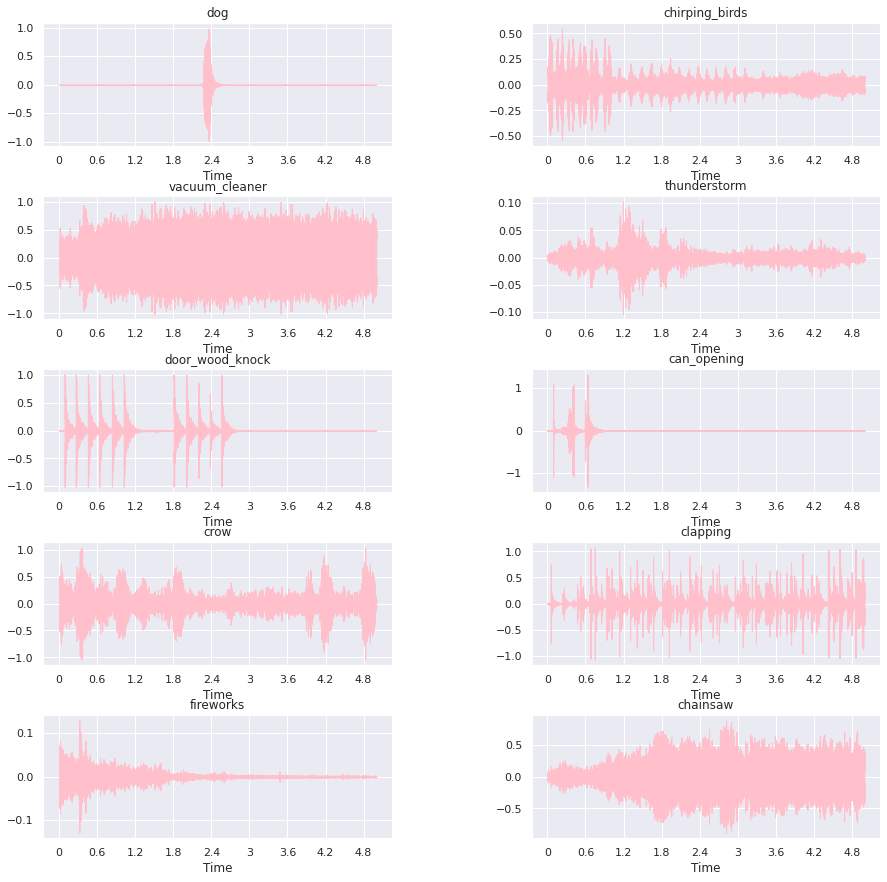

In [20]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels[:10]):
    fn = files[label]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, sample_rate = librosa.load(fn)
    display.waveshow(data, sr= sample_rate, color="pink")

In [21]:
s1 = r"../input/environmental-sound-classification-50/audio/audio/1-100210-B-36.wav"
x,freq = librosa.load(s1)
sr=freq

In [22]:
sound1=ipd.Audio(s1)
sound1

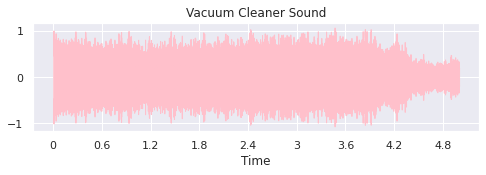

In [23]:
plt.figure(figsize=(8,2))
plt.title("Vacuum Cleaner Sound")
librosa.display.waveshow(x,sr=freq, color='pink')

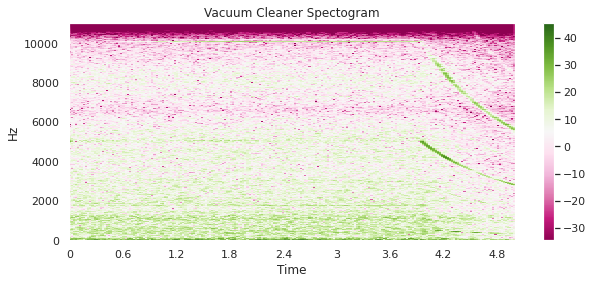

In [24]:
#Spectrogram
X=librosa.stft(x) #stft -> Short-time Fourier transform
desibel=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(10,4))
librosa.display.specshow(desibel, sr=sr,x_axis="time",y_axis="hz", cmap='PiYG')
plt.title("Vacuum Cleaner Spectogram")
plt.colorbar()

In [25]:
data_h, data_p = librosa.effects.hpss(x)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

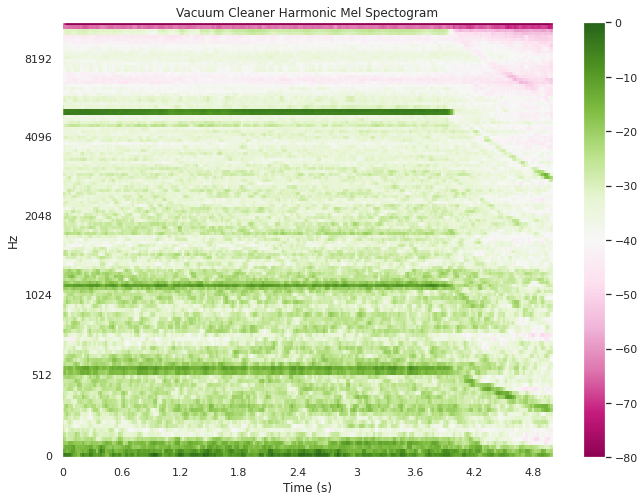

In [26]:
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sr, cmap='PiYG')
plt.title("Vacuum Cleaner Harmonic Mel Spectogram")
plt.colorbar()

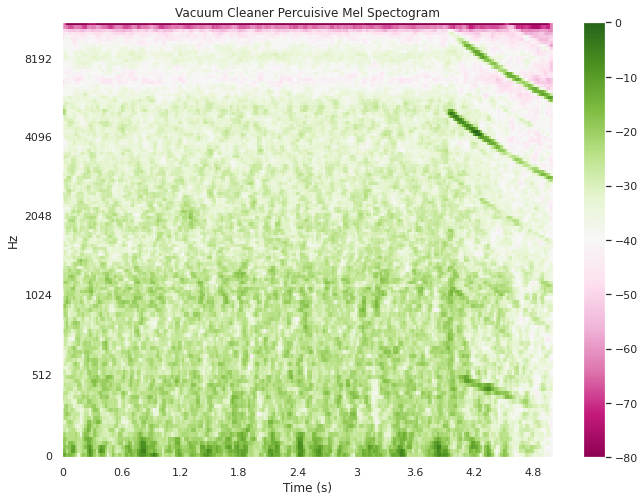

In [27]:
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sr, cmap='PiYG')
plt.title("Vacuum Cleaner Percuisive Mel Spectogram")
plt.colorbar()

shape of mfcc: (20, 216)


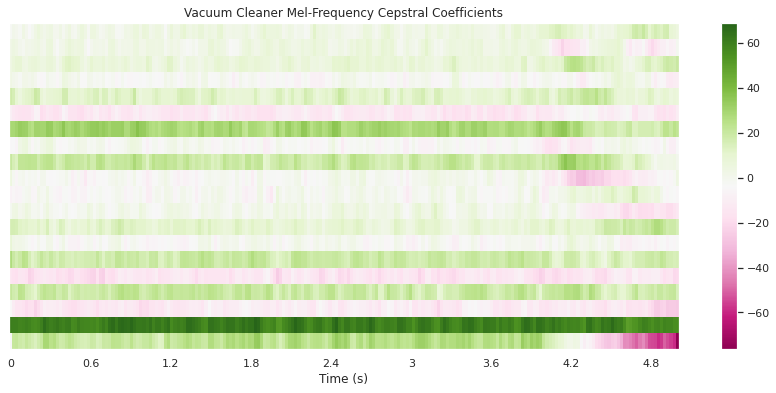

In [28]:
mfcc=librosa.feature.mfcc(x,sr=sr)
print("shape of mfcc:" ,mfcc.shape)

plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s", cmap='PiYG')
plt.title("Vacuum Cleaner Mel-Frequency Cepstral Coefficients")
plt.colorbar()

In [29]:
#Zero Crossing Rate
zero_crossing=librosa.zero_crossings(x)
print("Type of Zero Crossing Rate",type(zero_crossing))
print(zero_crossing, " --> See it contains booleans")
print("Total Number of Zero Crossing is: ",sum(zero_crossing))

Type of Zero Crossing Rate <class 'numpy.ndarray'>
[ True False False ...  True  True False]  --> See it contains booleans
Total Number of Zero Crossing is:  42945


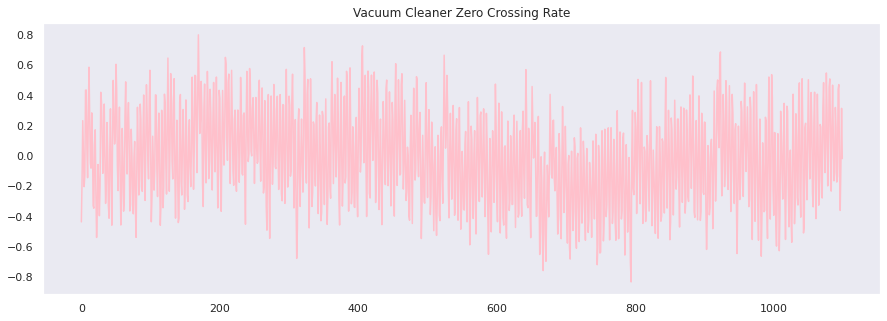

In [30]:
plt.figure(figsize=(15,5))
plt.title("Vacuum Cleaner Zero Crossing Rate")
plt.plot(x[4000:5100],  color='pink')
plt.grid()

In [31]:
#Spectral Centroid
spec_cent=librosa.feature.spectral_centroid(x)
print(spec_cent.shape)

plt.figure(figsize=(15,5))
plt.title("Vacuum Cleaner Spectral Centroid")
plt.semilogy(spec_cent.T, "r", color='pink')
plt.ylabel("Hz")

(1, 216)


Text(0, 0.5, 'Hz')

(1, 216)


Text(0, 0.5, 'Hz')

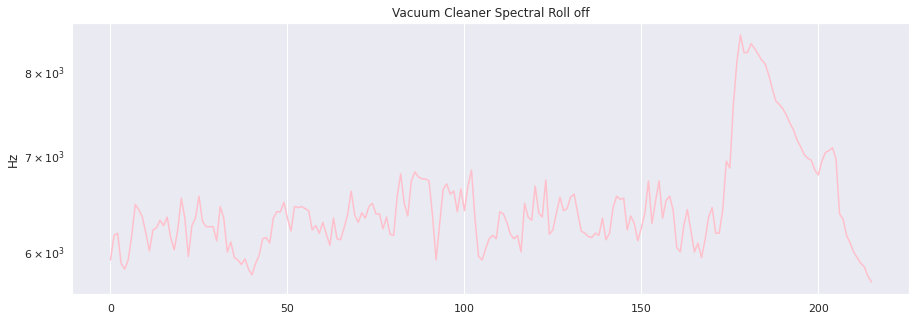

In [32]:
#Spectral Roll off
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
print(spec_roll.shape)

plt.figure(figsize=(15,5))
plt.title("Vacuum Cleaner Spectral Roll off")
plt.semilogy(spec_roll.T,"r", color='pink')
plt.ylabel("Hz")

In [ ]:
spec_band=librosa.feature.spectral_bandwidth(x,sr=sr)
print("Spectral Bandwidth Shape: ",spec_band.shape)
print("Spectral Bandwidth: ", spec_band)

In [33]:
S = librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]
RMSEn= librosa.feature.rms(S=S)
print(RMSEn.shape)


fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(RMSEn)
plt.title("Root Mean Squared Energy & log Pawer Spectogram")
ax[0].semilogy(times, RMSEn[0], label='RMS Energy', color='pink')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1], cmap='PiYG')
ax[1].set(title='log Power spectrogram')
plt.show()

(1, 212)


In [34]:
s2 = r"/kaggle/input/environmental-sound-classification-50/audio/audio/1-11687-A-47.wav" 
x,freq = librosa.load(s2)
sr=freq

In [35]:
sound2=ipd.Audio(s2)
sound2

In [36]:
plt.figure(figsize=(8,2))
plt.title("Airplane Sound")
librosa.display.waveshow(x,sr=freq, color="pink")

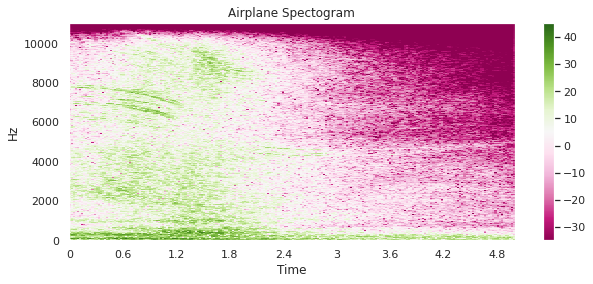

In [37]:
#Spectrogram
X=librosa.stft(x) #stft -> Short-time Fourier transform
desibel=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(10,4))
librosa.display.specshow(desibel, sr=sr,x_axis="time",y_axis="hz", cmap='PiYG')
plt.title("Airplane Spectogram")
plt.colorbar()

In [38]:
data_h, data_p = librosa.effects.hpss(x)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

In [39]:
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sr, cmap='PiYG')
plt.title("Airplane Harmonic Mel Spectogram")
plt.colorbar()

In [40]:
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sr, cmap='PiYG')
plt.title("Airplane Percuisive Mel Spectogram")
plt.colorbar()

shape of mfcc: (20, 216)


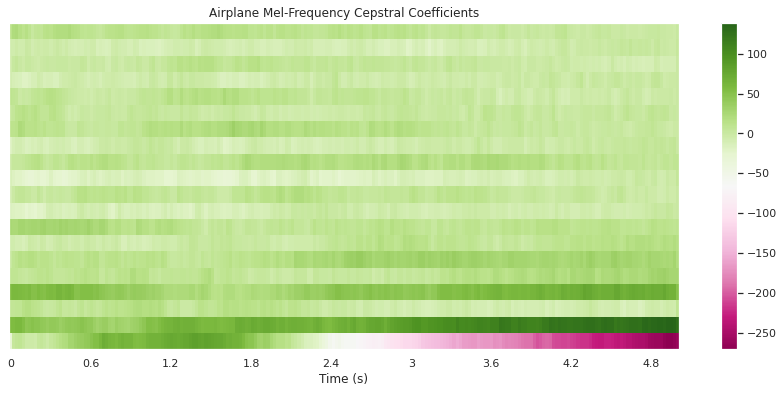

In [41]:
mfcc=librosa.feature.mfcc(x,sr=sr)
print("shape of mfcc:" ,mfcc.shape)

plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s", cmap='PiYG')
plt.title("Airplane Mel-Frequency Cepstral Coefficients")
plt.colorbar()

In [42]:
zero_crossing=librosa.zero_crossings(x)
print("Type of Zero Crossing Rate",type(zero_crossing))
print(zero_crossing, " --> See it contains booleans")
print("Total Number of Zero Crossing is: ",sum(zero_crossing))

Type of Zero Crossing Rate <class 'numpy.ndarray'>
[ True  True False ... False False False]  --> See it contains booleans
Total Number of Zero Crossing is:  15068


In [43]:
plt.figure(figsize=(15,5))
plt.title("Airplane Zero Crossing Rate")
plt.plot(x[4000:5100], color='pink')
plt.grid()

In [44]:
#Spectral Centroid
spec_cent=librosa.feature.spectral_centroid(x)
print(spec_cent.shape)
plt.figure(figsize=(15,5))
plt.title("Airplane Spectral Centroid")
plt.semilogy(spec_cent.T, "r", color='pink')
plt.ylabel("Hz")

(1, 216)


Text(0, 0.5, 'Hz')

(1, 216)


Text(0, 0.5, 'Hz')

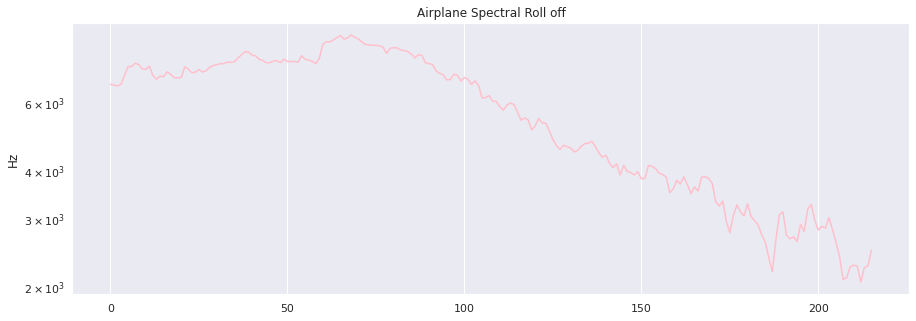

In [45]:
#Spectral Roll off
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
print(spec_roll.shape)

plt.figure(figsize=(15,5))
plt.title("Airplane Spectral Roll off")
plt.semilogy(spec_roll.T,"r", color='pink')
plt.ylabel("Hz")

In [46]:
spec_band=librosa.feature.spectral_bandwidth(x,sr=sr)
print("Spectral Bandwidth Shape: ",spec_band.shape)
print("Spectral Bandwidth: ", spec_band)

Spectral Bandwidth Shape:  (1, 216)
Spectral Bandwidth:  [[2747.69061396 2807.53574248 2791.62827433 2782.41841098 2890.34199203
  2951.96718446 2953.65129442 2945.92516005 2929.01218749 2916.04273427
  2923.83075894 2874.70036824 2814.40988013 2773.97992356 2791.36879181
  2834.57188542 2869.93930896 2801.65325014 2769.19191821 2763.42519129
  2795.99506981 2897.11859796 2958.7029457  2960.50872367 2914.89215362
  2936.47635285 2944.82982889 2941.17054741 2927.03645698 2868.8418159
  2941.32770963 3041.97725069 2960.02395722 2963.1164184  3065.0935752
  3055.33368388 3025.53860738 3068.19436353 3096.09952532 3171.52771642
  3215.94283223 3217.96741352 3191.3650683  3163.65730171 3191.52159031
  3163.69603118 3152.83394386 3121.37985988 3128.09655262 3182.15759829
  3149.99861597 3114.0115293  3086.30539985 3096.04305793 3166.20472917
  3104.22729699 3072.39316738 3059.80176551 3046.41259772 3124.59699464
  3297.70646328 3362.32628666 3366.07367636 3393.53655994 3459.7491633
  3470.290

(1, 212)


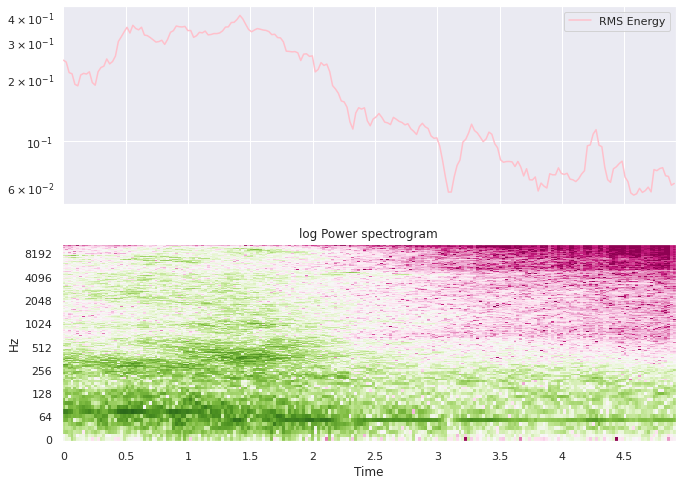

In [47]:
S = librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]
RMSEn= librosa.feature.rms(S=S)
print(RMSEn.shape)


fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(RMSEn)
plt.title("Root Mean Squared Energy & log Pawer Spectogram")
ax[0].semilogy(times, RMSEn[0], label='RMS Energy', color='pink')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1], cmap='PiYG')
ax[1].set(title='log Power spectrogram')
plt.show()

In [48]:
s3 = r"/kaggle/input/environmental-sound-classification-50/audio/audio/1-101296-A-19.wav" 
x,freq = librosa.load(s3)
sr=freq

In [49]:
sound3=ipd.Audio(s3)
sound3

In [50]:
plt.figure(figsize=(8,2))
plt.title("Thunderstorm Sound")
librosa.display.waveshow(x,sr=freq, color="pink")

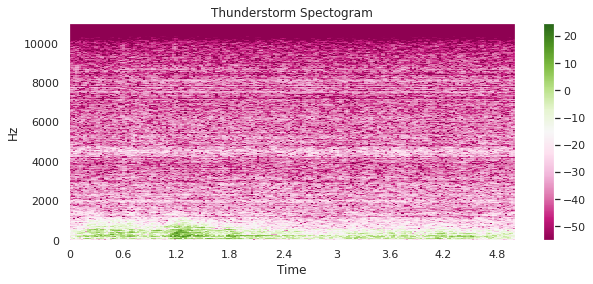

In [51]:
#Spectrogram
X=librosa.stft(x) #stft -> Short-time Fourier transform
desibel=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(10,4))
librosa.display.specshow(desibel, sr=sr,x_axis="time",y_axis="hz", cmap='PiYG')
plt.title("Thunderstorm Spectogram")
plt.colorbar()

In [52]:
data_h, data_p = librosa.effects.hpss(x)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

In [53]:
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sr, cmap='PiYG')
plt.title("Thunderstorm Harmonic Mel Spectogram")
plt.colorbar()

In [54]:
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sr, cmap='PiYG')
plt.title("Thunderstorm Percuisive Mel Spectogram")
plt.colorbar()

shape of mfcc: (20, 216)


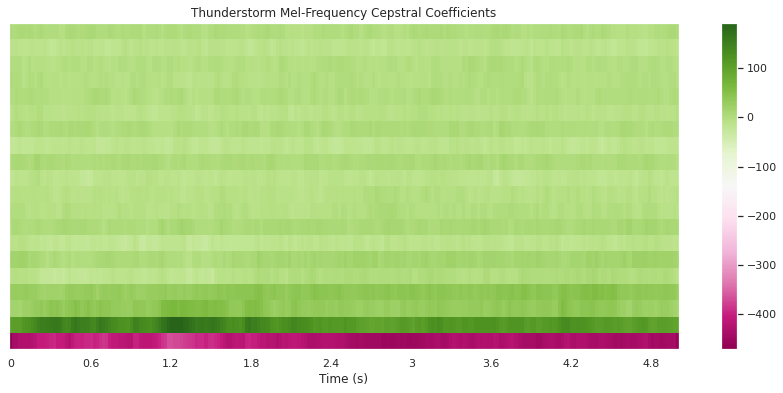

In [55]:
mfcc=librosa.feature.mfcc(x,sr=sr)
print("shape of mfcc:" ,mfcc.shape)

plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s", cmap='PiYG')
plt.title("Thunderstorm Mel-Frequency Cepstral Coefficients")
plt.colorbar()

In [56]:
zero_crossing=librosa.zero_crossings(x)
print("Type of Zero Crossing Rate",type(zero_crossing))
print(zero_crossing, " --> See it contains booleans")
print("Total Number of Zero Crossing is: ",sum(zero_crossing))

Type of Zero Crossing Rate <class 'numpy.ndarray'>
[ True False  True ... False False False]  --> See it contains booleans
Total Number of Zero Crossing is:  5116


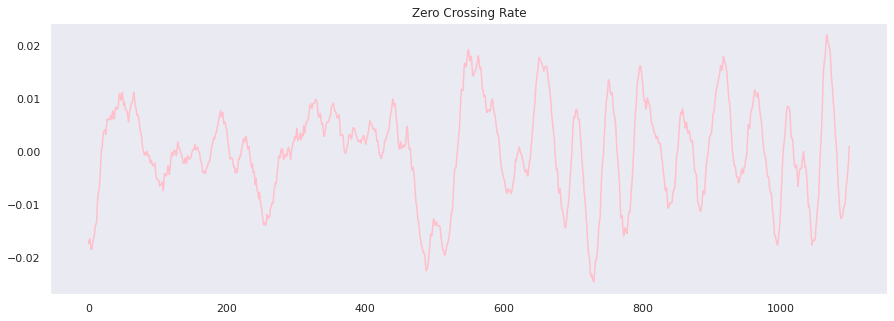

In [57]:
plt.figure(figsize=(15,5))
plt.title("Zero Crossing Rate")
plt.plot(x[4000:5100], color="pink")
plt.grid()

(1, 216)


Text(0, 0.5, 'Hz')

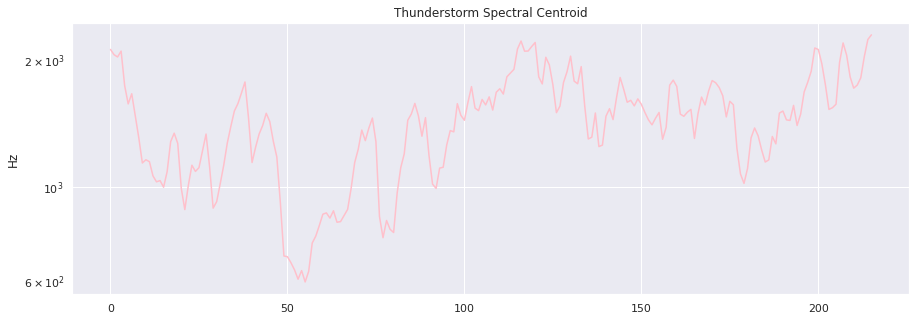

In [58]:
#Spectral Centroid
spec_cent=librosa.feature.spectral_centroid(x)
print(spec_cent.shape)
plt.figure(figsize=(15,5))
plt.title("Thunderstorm Spectral Centroid")
plt.semilogy(spec_cent.T, "r", color='pink')
plt.ylabel("Hz")

(1, 216)


Text(0, 0.5, 'Hz')

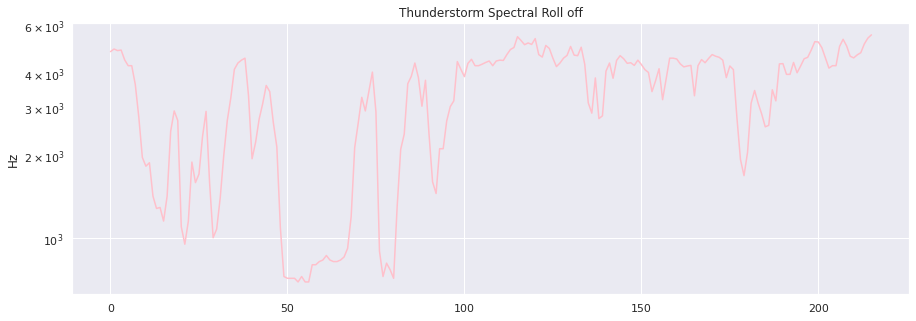

In [59]:
#Spectral Roll off
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
print(spec_roll.shape)

plt.figure(figsize=(15,5))
plt.title("Thunderstorm Spectral Roll off")
plt.semilogy(spec_roll.T,"r", color='pink')
plt.ylabel("Hz")

In [60]:
spec_band=librosa.feature.spectral_bandwidth(x,sr=sr)
print("Spectral Bandwidth Shape: ",spec_band.shape)
print("Spectral Bandwidth: ", spec_band)

Spectral Bandwidth Shape:  (1, 216)
Spectral Bandwidth:  [[2511.82321675 2541.85390628 2527.56533089 2520.1015911  2380.44306795
  2272.43751732 2274.24568032 2178.28907849 2080.20110505 1867.77873345
  1840.61549456 1828.04066925 1741.44380325 1731.70375421 1729.16968125
  1714.02485238 1795.34427498 1965.31893678 2060.50549996 2039.71373144
  1705.27221697 1579.65522937 1744.42386732 1844.03999621 1802.18083131
  1869.50145469 1984.0203441  2075.25876174 1881.29932783 1621.01549744
  1649.17280525 1775.69047101 1927.16294122 2051.5789405  2136.20798748
  2227.66762794 2249.53202306 2325.4380305  2388.04571101 2176.25231495
  1936.2235859  2025.47929671 2058.05118815 2102.41881656 2174.55639105
  2158.84902293 2027.92854956 1917.7181747  1695.01012436 1423.72427284
  1380.511458   1286.5454458  1230.49233378 1177.89967635 1216.72182846
  1200.05060371 1256.75910803 1369.44523117 1411.49583263 1513.18888719
  1616.11532368 1600.87832499 1547.91656568 1615.17024514 1522.167574
  1520.35

(1, 212)


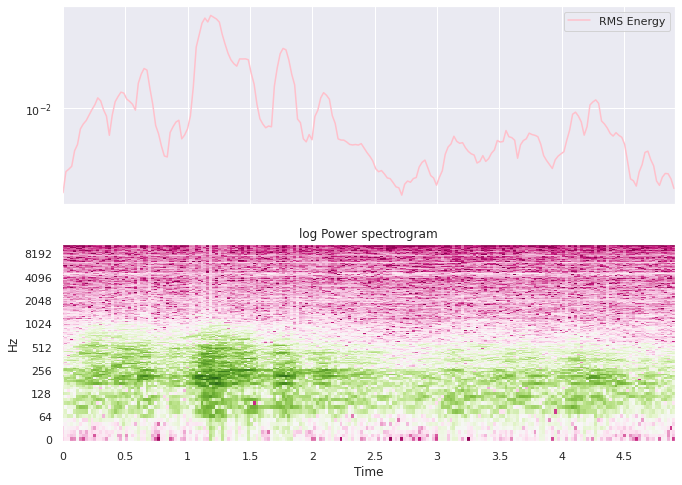

In [61]:
S = librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]
RMSEn= librosa.feature.rms(S=S)
print(RMSEn.shape)


fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(RMSEn)
plt.title("Root Mean Squared Energy & log Pawer Spectogram")
ax[0].semilogy(times, RMSEn[0], label='RMS Energy', color='pink')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1], cmap='PiYG')
ax[1].set(title='log Power spectrogram')
plt.show()

In [10]:
audio_fpath = "../input/environmental-sound-classification-50/audio/audio/44100/"

In [9]:
#class AudioAugmentation:
    def __init__(self):
        self.input_length = 220500

    def read_audio_file(self, audio_fpath):
        data = librosa.load(audio_fpath)[0]
        if len(data) > self.input_length:
            data = data[:self.input_length]
        else:
            data = np.pad(data, (0, max(0, self.input_length - len(data))), mode='constant')
        return data
    
    def add_noise(self, data):
        noise = np.random.randn(len(data))
        data_noise = data + 0.005 * noise
        return data_noise
    
    def shift(self, data):
        return data[22050:] + data[:22050]
    
    def stretch(self, data, rate=1):
        data = np.interp(np.arange(0,len(data),rate),np.arange(len(data)),data)
        if len(data) > self.input_length:
            data = data[:self.input_length]
        else:
            data = np.pad(data, (0, max(0, self.input_length - len(data))), mode='constant')
        return data
    
    def write_audio_file(self, file, data, sample_rate=44100):
        librosa.output.write_wav(file, data, sample_rate)

IndentationError: unexpected indent (3946255488.py, line 2)

In [11]:
class AudioAugmentation:
    
    def read_audio_file(self, file_path):
        input_length = 220500
        data = librosa.load(file_path)[0]
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data
    
    def add_noise(self, data):
        noise = np.random.randn(len(data))
        data_noise = data + 0.005 * noise
        return data_noise
    
    def shift(self, data):
        return np.roll(data, 22050)
    
    def stretch(self, data, rate=1):
        input_length = 220500
        data = librosa.effects.time_stretch(data, rate)
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data
    def write_audio_file(self, file, data, sample_rate=44100):
        librosa.output.write_wav(file, data, sample_rate)

In [12]:
#Data Augmentation
aa = AudioAugmentation()
extracted_data = []
for index, row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_fpath),str(row["filename"]))
    class_labels = row['category']
    y, sr = librosa.load(file_name, sr=44100)
    for i in range(8):
        if i == 1 or i >3:
            data = aa.add_noise(y)
        if i%3 == 2 or i == 7:
            data = aa.shift(y)
        if i%3 == 0 or i == 7:
            data = aa.stretch(y, rate=1.25)
        feature = librosa.feature.mfcc(y=data, sr=sr)
        scaled_feature = np.mean(feature.T,axis=0)
        extracted_data.append([scaled_feature, class_labels])
np.array(extracted_data).shape

2000it [27:59,  1.19it/s]


(16000, 2)

In [82]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])
print(feature_df.head())

                                             feature class
0  [-632.056, 6.9280477, -5.63157, -3.518161, -2....   dog
1  [-344.0096861280355, -0.7127728689505037, -4.6...   dog
2  [-580.6255, 8.185607, -6.650708, -4.2932887, -...   dog
3  [-632.056, 6.9280477, -5.63157, -3.518161, -2....   dog
4  [-344.2949498792224, -1.024266023860936, -4.17...   dog


In [83]:
x = np.array(feature_df['feature'].tolist())
x.shape

(16000, 20)

In [84]:
target = np.array(feature_df['class'].tolist())

In [85]:
y_new = pd.get_dummies(target)
print(y_new.shape)
y_new.head()

(16000, 50)


airplane  breathing  brushing_teeth  can_opening  car_horn  cat  chainsaw  \
0         0          0               0            0         0    0         0   
1         0          0               0            0         0    0         0   
2         0          0               0            0         0    0         0   
3         0          0               0            0         0    0         0   
4         0          0               0            0         0    0         0   

   chirping_birds  church_bells  clapping  ...  siren  sneezing  snoring  \
0               0             0         0  ...      0         0        0   
1               0             0         0  ...      0         0        0   
2               0             0         0  ...      0         0        0   
3               0             0         0  ...      0         0        0   
4               0             0         0  ...      0         0        0   

   thunderstorm  toilet_flush  train  vacuum_cleaner  washing_machine  \
0             0             0      0               0                0   
1             0             0      0               0                0   
2             0             0      0               0                0   
3             0             0      0               0                0   
4             0             0      0               0                0   

   water_drops  wind  
0            0     0  
1            0     0  
2            0     0  
3            0     0  
4            0     0  

[5 rows x 50 columns]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2,shuffle = True, random_state=42)
print(str(X_train.shape)+ ', ' + str(X_test.shape))
inp = (1, 20)
np.array(X_train).reshape(12800, 1, 20)

(12800, 20), (3200, 20)


array([[[-3.25984862e+02,  1.03617304e+01, -7.05656601e+00, ...,
         -6.07892648e-01,  2.33587959e-01, -9.51212050e-01]],

       [[-3.17512487e+02,  1.79096227e+01,  7.90833318e+00, ...,
          1.41832420e-01, -1.00267586e+00, -1.30303255e+00]],

       [[-3.77771606e+02,  1.41407684e+02,  3.05585537e+01, ...,
          2.42460704e+00,  2.67154765e+00,  2.53657269e+00]],

       ...,

       [[-8.74427575e+01,  9.24993348e+01, -7.63206033e+01, ...,
         -8.59094932e-01,  4.13348331e-01,  5.31959913e-02]],

       [[-5.73456177e+02,  2.29955635e+01,  1.19995480e+01, ...,
          2.22754526e+00,  2.15498090e+00,  2.11988950e+00]],

       [[-1.67356766e+02, -1.81760845e+01, -2.26542664e+00, ...,
         -9.28382492e+00, -4.92429352e+00, -2.63465261e+00]]])

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x, y_new, test_size=0.25, random_state=42)
print(str(X_train.shape)+ ', ' + str(X_val.shape))

(12000, 20), (4000, 20)


In [19]:
inp = (1, 20)
np.array(X_train).reshape(12000, 1, 20)

array([[[-6.57758642e+00,  1.28888157e+02, -6.30259303e+01, ...,
          5.29867681e+00, -4.47482653e-01,  3.19044656e+00]],

       [[-1.96464905e+02,  1.50849945e+02, -1.45181456e+01, ...,
          3.01586151e-01,  1.75688639e-01,  3.81475878e+00]],

       [[-2.84563431e+02,  4.65576303e+01,  6.99983570e+00, ...,
          9.38042363e-01,  1.26773844e+00,  4.71200923e+00]],

       ...,

       [[-8.74427575e+01,  9.24993348e+01, -7.63206033e+01, ...,
         -8.59094932e-01,  4.13348331e-01,  5.31959913e-02]],

       [[-5.73456177e+02,  2.29955635e+01,  1.19995480e+01, ...,
          2.22754526e+00,  2.15498090e+00,  2.11988950e+00]],

       [[-1.67356766e+02, -1.81760845e+01, -2.26542664e+00, ...,
         -9.28382492e+00, -4.92429352e+00, -2.63465261e+00]]])

***LSTM***

In [20]:
# LSTM - complete with model definition, summary, fit and plots.
model_bidirectional = keras.models.Sequential()
model_bidirectional.add(keras.Input(shape = (1,20)))
model_bidirectional.add(keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences = True)))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(keras.layers.Bidirectional(keras.layers.LSTM(2048, return_sequences = True)))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(keras.layers.Bidirectional(keras.layers.LSTM(3036, return_sequences = False)))
model_bidirectional.add(Dropout(0.2))  
model_bidirectional.add(Flatten())         
model_bidirectional.add(keras.layers.Dense(50, activation="softmax"))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model_bidirectional.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

2023-01-14 18:24:12.186997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 18:24:12.188072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 18:24:12.188751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 18:24:12.190307: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
model_bidirectional.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 2048)           8560640   
_________________________________________________________________
dropout (Dropout)            (None, 1, 2048)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1, 4096)           67125248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 4096)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 6072)              173246304 
_________________________________________________________________
dropout_2 (Dropout)          (None, 6072)              0         
_________________________________________________________________
flatten (Flatten)            (None, 6072)              0

In [39]:
es = EarlyStopping(
    monitor='val_accuracy', 
    restore_best_weights=True, 
    patience=30, min_delta = 0.001)

In [40]:
len(y_train)

12000

In [41]:
history=model_bidirectional.fit(np.array(X_train).reshape(12000, 1, 20),
        np.array(y_train),
        epochs=15,
        callbacks = [es],
        shuffle = True,
        batch_size = 100,
#         steps_per_epoch = 4,
        validation_data = (np.array(X_test).reshape(3200,1,20),
                            np.array(y_test))
                 )

2023-01-13 18:31:49.457908: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-01-13 18:31:55.884342: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


120/120 [==============================] - 20s 103ms/step - loss: 2.6091 - accuracy: 0.2635 - val_loss: 2.0531 - val_accuracy: 0.4062
Epoch 2/15
120/120 [==============================] - 10s 86ms/step - loss: 1.7853 - accuracy: 0.4690 - val_loss: 1.5320 - val_accuracy: 0.5362
Epoch 3/15
120/120 [==============================] - 11s 89ms/step - loss: 1.2533 - accuracy: 0.6143 - val_loss: 0.9883 - val_accuracy: 0.6900
Epoch 4/15
120/120 [==============================] - 10s 86ms/step - loss: 0.7786 - accuracy: 0.7526 - val_loss: 0.5799 - val_accuracy: 0.8278
Epoch 5/15
120/120 [==============================] - 10s 86ms/step - loss: 0.4765 - accuracy: 0.8521 - val_loss: 0.3490 - val_accuracy: 0.8888
Epoch 6/15
120/120 [==============================] - 11s 89ms/step - loss: 0.2977 - accuracy: 0.9049 - val_loss: 0.3292 - val_accuracy: 0.9062
Epoch 7/15
120/120 [==============================] - 10s 86ms/step - loss: 0.2475 - accuracy: 0.9204 - val_loss: 0.2405 - val_accuracy: 0.9300
Ep

Text(0, 0.5, 'Accuracy')

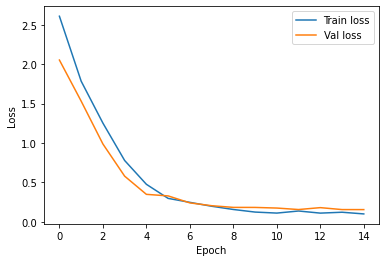

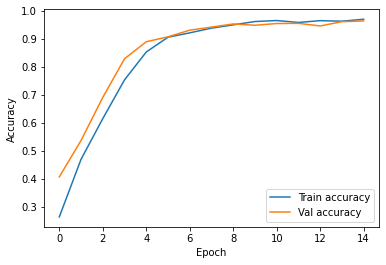

In [42]:
# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [141]:
print(x.shape)

(16000, 20)


In [142]:
y_pred = model_bidirectional.predict(np.array(x).reshape(16000, 1,20))

In [143]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([18, 18, 18, ..., 18, 18, 18])

In [144]:
y_true = np.argmax(np.array(y_new), axis=1)
y_true

array([18, 18, 18, ..., 18, 18, 18])

In [145]:
print(np.mean(y_pred_classes == y_true))
m = AUC()
m.update_state(y_new, y_pred)
print(m.result())

0.9840625
tf.Tensor(0.99845153, shape=(), dtype=float32)


<Figure size 792x576 with 0 Axes>

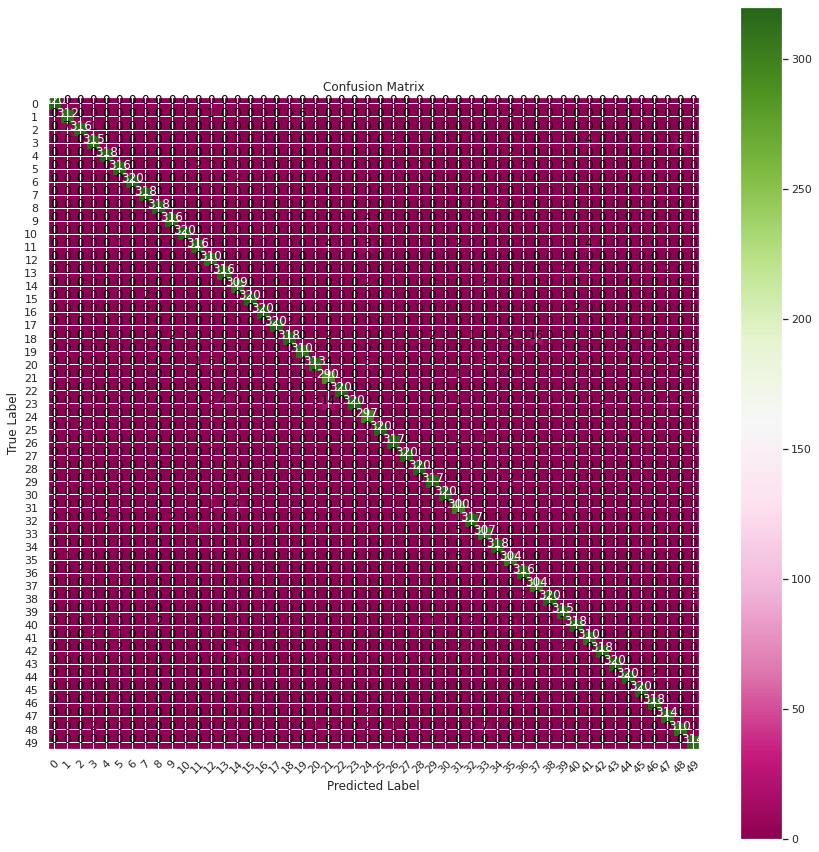

In [146]:
cm = confusion_matrix(y_pred_classes, y_true,)
import itertools
plt.clf()
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.PiYG, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(50)))
plt.xticks(tick_marks, range(50), rotation=45)
plt.yticks(tick_marks, range(50))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_LSTM_ESC50.png')

In [147]:
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.97      0.97      0.97       320
           2       0.98      0.99      0.98       320
           3       0.96      0.98      0.97       320
           4       0.99      0.99      0.99       320
           5       0.99      0.99      0.99       320
           6       0.99      1.00      1.00       320
           7       1.00      0.99      1.00       320
           8       0.99      0.99      0.99       320
           9       0.99      0.99      0.99       320
          10       1.00      1.00      1.00       320
          11       0.94      0.99      0.96       320
          12       1.00      0.97      0.98       320
          13       0.98      0.99      0.98       320
          14       0.99      0.97      0.98       320
          15       0.99      1.00      1.00       320
          16       0.99      1.00      1.00       320
          17       0.99    

In [148]:
test_results = []
answers = []
for index, row in tqdm(data2.iterrows()):
    x,sr = librosa.load(audio_fpath+row['filename'], sr=44100)
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    sample = np.array(mfcc_mean).reshape(1, 1, 20)
    pred = model_bidirectional.predict(sample)
    pred_class = np.argmax(pred,axis=1 )
#     print(pred_class[0])
#     print(row['target'])
    test_results.append(pred_class[0])
    answers.append(row['category'])
print(np.mean(np.array(test_results) == np.array(answers)))

2000it [04:42,  7.09it/s]

0.0


In [43]:
#saving the model
save_model(model_bidirectional,"model_bidirectional.h5")

***LSTM WITH GRU***

In [69]:
#Considering the GRU layer
model_bidirectional2 = keras.models.Sequential()
model_bidirectional2.add(keras.Input(shape = (1,20)))
model_bidirectional2.add(keras.layers.GRU(256, return_sequences = True))
model_bidirectional2.add(keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences = True)))
model_bidirectional2.add(Dropout(0.2))
model_bidirectional2.add(keras.layers.Bidirectional(keras.layers.LSTM(2048, return_sequences = True)))
model_bidirectional2.add(Dropout(0.2))
model_bidirectional2.add(keras.layers.GRU(512, return_sequences = False))
model_bidirectional2.add(Dropout(0.2))  
model_bidirectional2.add(Flatten())         
model_bidirectional2.add(keras.layers.Dense(50, activation="softmax"))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model_bidirectional2.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [70]:
model_bidirectional2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 256)            213504    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1, 2048)           10493952  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 2048)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1, 4096)           67125248  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 4096)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               7080960   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [71]:
es = EarlyStopping(
    monitor='val_accuracy', 
    restore_best_weights=True, 
    patience=30, min_delta = 0.001)

In [165]:
X_train.shape

(12000, 20)

In [166]:
history=model_bidirectional2.fit(np.array(X_train).reshape(12000, 1, 20),
        np.array(y_train),
        epochs=15,
        callbacks = [es],
        shuffle = True,
        batch_size = 100,
#         steps_per_epoch = 4,
        validation_data = (np.array(X_test).reshape(3200,1,20),
                            np.array(y_test))
                 )

Epoch 1/15
120/120 [==============================] - 11s 46ms/step - loss: 2.8470 - accuracy: 0.2079 - val_loss: 2.3344 - val_accuracy: 0.3253
Epoch 2/15
120/120 [==============================] - 4s 36ms/step - loss: 2.0629 - accuracy: 0.3986 - val_loss: 1.9383 - val_accuracy: 0.4244
Epoch 3/15
120/120 [==============================] - 4s 35ms/step - loss: 1.5086 - accuracy: 0.5463 - val_loss: 1.2887 - val_accuracy: 0.5947
Epoch 4/15
120/120 [==============================] - 4s 35ms/step - loss: 1.0133 - accuracy: 0.6933 - val_loss: 0.8524 - val_accuracy: 0.7522
Epoch 5/15
120/120 [==============================] - 4s 32ms/step - loss: 0.6077 - accuracy: 0.8235 - val_loss: 0.5532 - val_accuracy: 0.8547
Epoch 6/15
120/120 [==============================] - 4s 35ms/step - loss: 0.3678 - accuracy: 0.9017 - val_loss: 0.3138 - val_accuracy: 0.9191
Epoch 7/15
120/120 [==============================] - 4s 32ms/step - loss: 0.2436 - accuracy: 0.9370 - val_loss: 0.2508 - val_accuracy: 0.931

Text(0, 0.5, 'Accuracy')

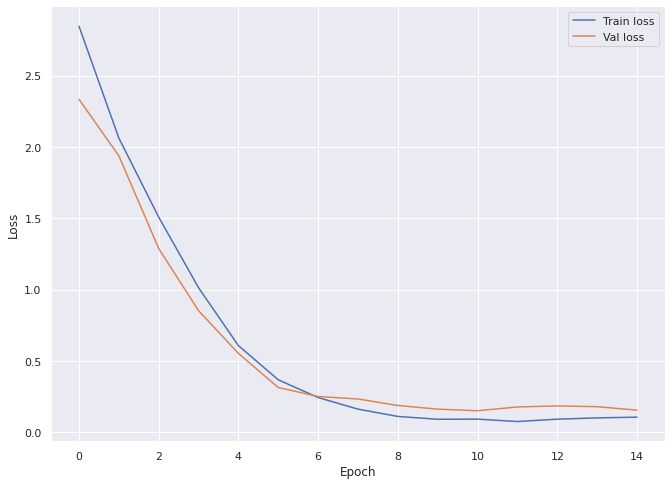

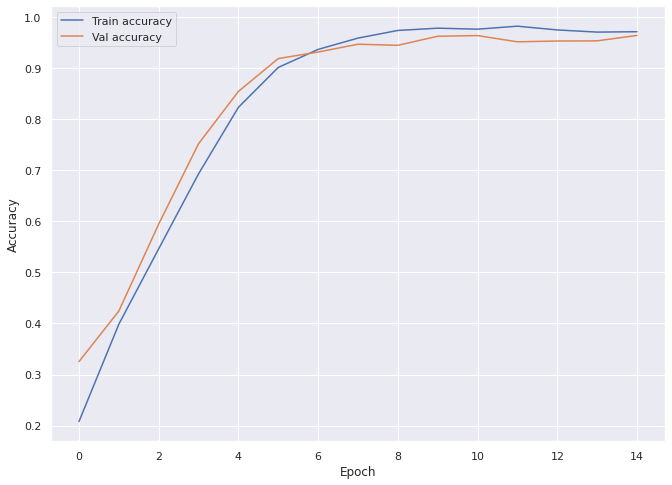

In [168]:
# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [169]:
print(x.shape)

(16000, 20)


In [171]:
y_pred = model_bidirectional2.predict(np.array(x).reshape(16000, 1,20))

In [172]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([18, 18, 18, ..., 18, 18, 18])

In [173]:
y_true = np.argmax(np.array(y_new), axis=1)
y_true

array([18, 18, 18, ..., 18, 18, 18])

In [174]:
print(np.mean(y_pred_classes == y_true))
m = AUC()
m.update_state(y_new, y_pred)
print(m.result())

0.981875
tf.Tensor(0.99915725, shape=(), dtype=float32)


<Figure size 792x576 with 0 Axes>

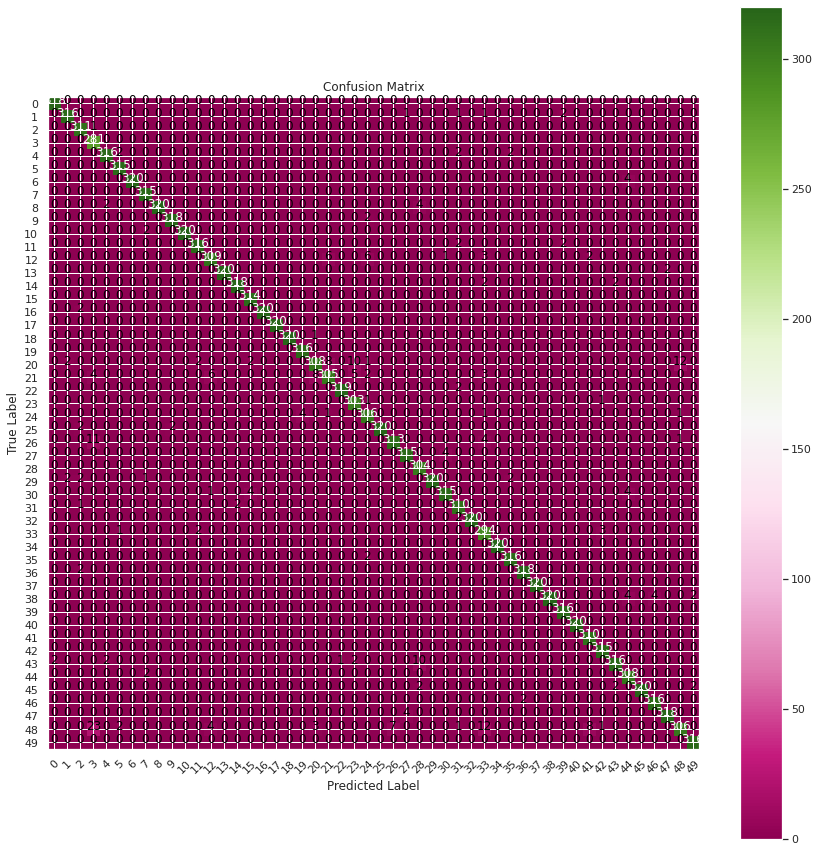

In [175]:
cm = confusion_matrix(y_pred_classes, y_true,)
import itertools
plt.clf()
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.PiYG, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(50)))
plt.xticks(tick_marks, range(50), rotation=45)
plt.yticks(tick_marks, range(50))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_LSTM_GRU_ESC50.png')

In [176]:
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       320
           1       0.98      0.99      0.99       320
           2       1.00      0.97      0.98       320
           3       1.00      0.88      0.94       320
           4       0.98      0.99      0.98       320
           5       1.00      0.98      0.99       320
           6       0.99      1.00      0.99       320
           7       1.00      0.98      0.99       320
           8       0.98      1.00      0.99       320
           9       0.99      0.99      0.99       320
          10       0.99      1.00      1.00       320
          11       0.99      0.99      0.99       320
          12       0.94      0.97      0.96       320
          13       0.99      1.00      1.00       320
          14       0.99      0.99      0.99       320
          15       1.00      0.98      0.99       320
          16       0.99      1.00      1.00       320
          17       1.00    

In [177]:
test_results = []
answers = []
for index, row in tqdm(data2.iterrows()):
    x,sr = librosa.load(audio_fpath+row['filename'], sr=44100)
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    sample = np.array(mfcc_mean).reshape(1, 1, 20)
    pred = model_bidirectional2.predict(sample)
    pred_class = np.argmax(pred,axis=1 )
#     print(pred_class[0])
#     print(row['target'])
    test_results.append(pred_class[0])
    answers.append(row['category'])
print(np.mean(np.array(test_results) == np.array(answers)))

2000it [04:02,  8.25it/s]

0.0


In [180]:
#saving the model
save_model(model_bidirectional2,"model_bidirectional2.h5")

In [44]:
# load the model
model = load_model('model_bidirectional.h5')

In [22]:
pip install neupy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.1 MB/s eta 0:00:0000:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.6/367.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 4.1.1
    Uninstalling progressbar2-4.1.1:
      Successfully uninstalled progressbar2-4.1.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tens

In [37]:
from neupy import algorithms

In [54]:
data2.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

In [60]:
data_f=data.loc[:, ~data.columns.isin(['filename', 'category'])]
features2=len(data_f.columns)
features2

5

In [61]:
neural_gas = algorithms.GrowingNeuralGas(n_inputs=features2,shuffle_data=True,verbose=True,max_edge_age=10,n_iter_before_neuron_added=50, max_nodes=100)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 10
[OPTION] max_nodes = 100
[OPTION] min_distance_for_update = 0.0
[OPTION] n_inputs = 5
[OPTION] n_iter_before_neuron_added = 50
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.05
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.2
[OPTION] verbose = True



In [51]:
neural_gas.graph.n_nodes

0

In [46]:
len(neural_gas.graph.edges)

0

In [97]:
x2=tf. convert_to_tensor(np.array(x).reshape(16000, 1,20))

In [1]:

# create an adversarial example
def create_adversarial_example(x2, y_new, model_bidirectional):
    # convert the label to a one-hot encoded vector
    y = tf.keras.utils.to_categorical(y_new, num_classes=50)
# compute the gradient of the loss with respect to the input
    with tf.GradientTape() as tape:
        tape.watch(x2)
        logits = model_bidirectional(x2)
        loss_value = tf.losses.categorical_crossentropy(y_new, logits)
    grads = tape.gradient(loss_value, x2)
# create an adversarial example by adding the sign of the gradient to the input
    epsilon = 0.01
    x_adv = x2 + epsilon * tf.sign(grads)
    x_adv = tf.clip_by_value(x_adv, 0, 1)
    return x_adv

In [30]:
len(y_new)

16000

In [25]:
#def create_adversarial_example(x2, y_new, model_bidirectional):
    # convert the label to a one-hot encoded vector
    y = tf.keras.utils.to_categorical(y_new, num_classes=20)
    # compute the gradient of the loss with respect to the input
    logits = model_bidirectional(x2)
    loss = tf.losses.categorical_crossentropy(y_new, logits)
    grads, = tf.gradients(loss, x2)
    # create an adversarial example by adding the sign of the gradient to the input
    epsilon = 0.01
    x_adv = x2 + epsilon * tf.sign(grads)
    x_adv = tf.clip_by_value(x_adv, 0, 1)
    return x_adv

In [99]:
# create an adversarial example and test it with the model
x_adv = create_adversarial_example(x2, y_new, model_bidirectional)
y_pred_adv = model_bidirectional(x_adv).argmax() # get the predicted label
acc = (y_pred_adv == y_new).mean() # calculate the accuracy
print(f'Model accuracy on adversarial example: {acc:.2f}')

2023-01-14 20:09:00.705663: W tensorflow/core/common_runtime/bfc_allocator.cc:457] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.13GiB (rounded to 2289484032)requested by op CudnnRNN
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-01-14 20:09:00.705738: I tensorflow/core/common_runtime/bfc_allocator.cc:1004] BFCAllocator dump for GPU_0_bfc
2023-01-14 20:09:00.705768: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (256): 	Total Chunks: 31, Chunks in use: 31. 7.8KiB allocated for chunks. 7.8KiB in use in bin. 728B client-requested in use in bin.
2023-01-14 20:09:00.705783: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-01-14 20:09:00.705796: I tensorflow/core/comm

InternalError: Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 4096, 3036, 1, 1, 16000, 3036]  [Op:CudnnRNN]

In [98]:
# test the adversarial example
x_adv = create_adversarial_example(x2, y_new, model_bidirectional)
logits_adv = model_bidirectional(x_adv)
y_pred_adv = np.argmax(logits_adv, axis=1)
accuracy = accuracy_score(y_new, y_pred_adv)
print('Accuracy on adversarial example:', accuracy)

2023-01-14 19:56:28.507009: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2023-01-14 19:56:39.861290: W tensorflow/core/common_runtime/bfc_allocator.cc:457] Allocator (GPU_0_bfc) ran out of memory trying to allocate 330.49MiB (rounded to 346541312)requested by op CudnnRNNBackprop
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-01-14 19:56:39.861358: I tensorflow/core/common_runtime/bfc_allocator.cc:1004] BFCAllocator dump for GPU_0_bfc
2023-01-14 19:56:39.861381: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (256): 	Total Chunks: 31, Chunks in use: 31. 7.8KiB allocated for chunks. 7.8KiB in use in bin. 728B client-requested in use in bin.
2023-01-14 19:56:39.861396: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated f

ResourceExhaustedError: OOM when allocating tensor with shape[86635296] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:CudnnRNNBackprop]

n_runtime/bfc_allocator.cc:1074] total_region_allocated_bytes_: 15774515200 memory_limit_: 15774515200 available bytes: 0 curr_region_allocation_bytes_: 31549030400
2023-01-14 19:56:39.866445: I tensorflow/core/common_runtime/bfc_allocator.cc:1080] Stats: 
Limit:                     15774515200
InUse:                     14997630208
MaxInUse:                  15225740032
NumAllocs:                         514
MaxAllocSize:               2289484032
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-01-14 19:56:39.866482: W tensorflow/core/common_runtime/bfc_allocator.cc:468] ***************************************************************************************************_
2023-01-14 19:56:39.866601: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at cudnn_rnn_ops.cc:1945 : Resource exhausted: OOM when allocating tensor with shape[86635296] and type float on /job:localhost/replica:0/task:0/device: